**IMPORT OF THE DATASET**

In [132]:
import pandas as pd 

df=pd.read_csv("garments_worker_productivity.csv")

df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [133]:
#EXPLORING THE TYPES OF THE FEATURES
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

**EDA**

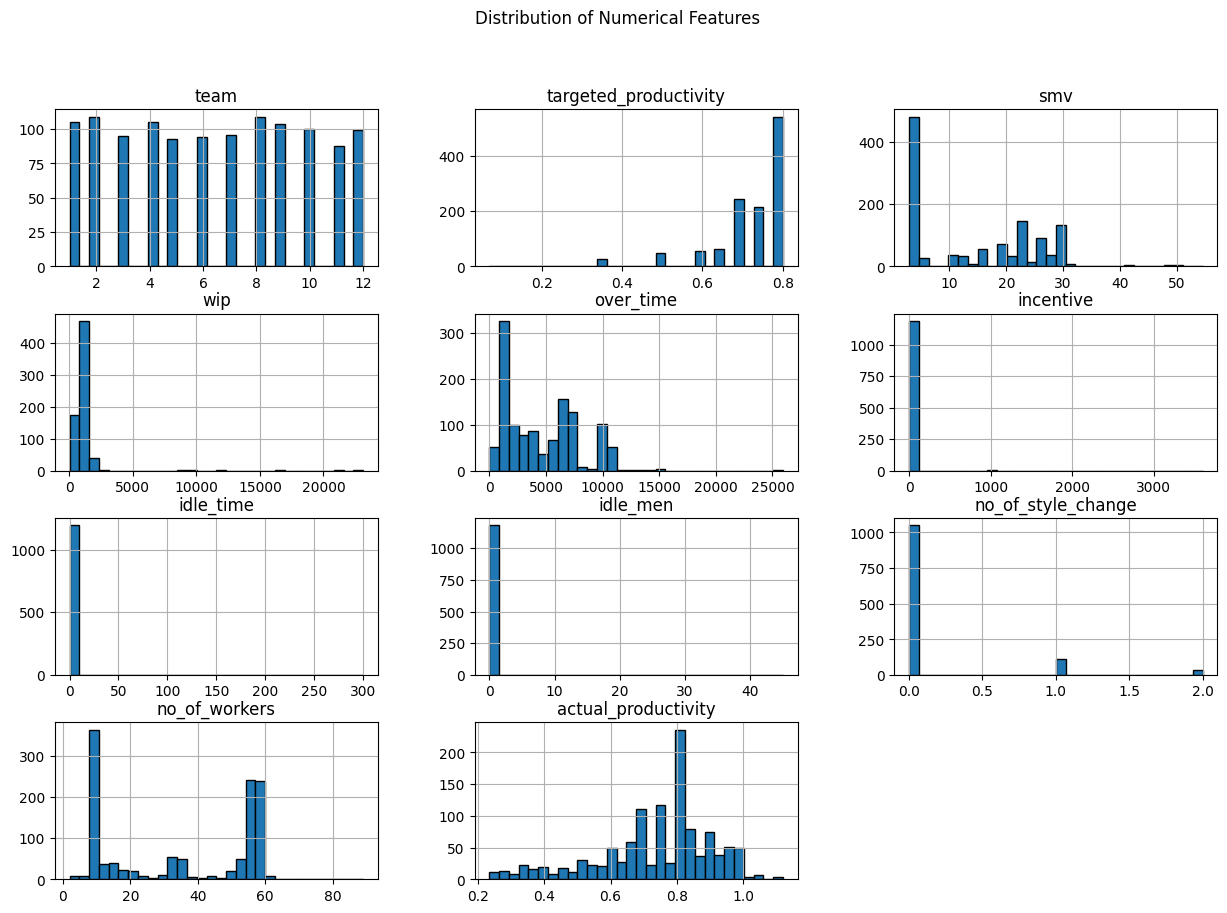

In [134]:
#plot of al the numerical feature
import matplotlib.pyplot as plt

numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

df[numerical_features].hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Distribution of Numerical Features')
plt.show()

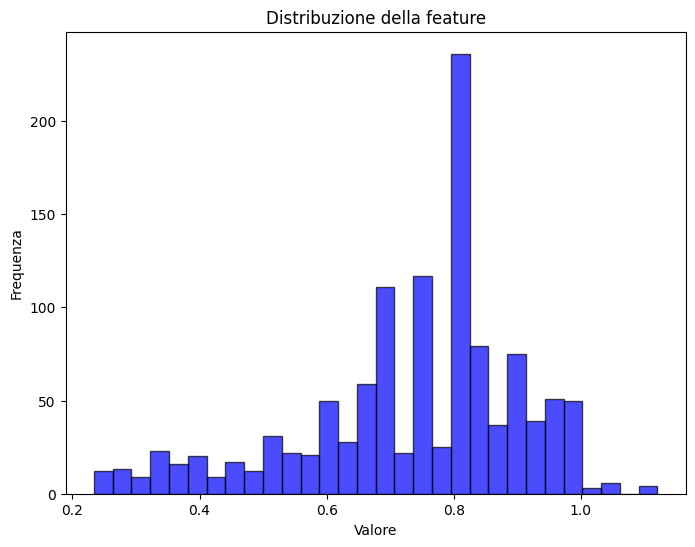

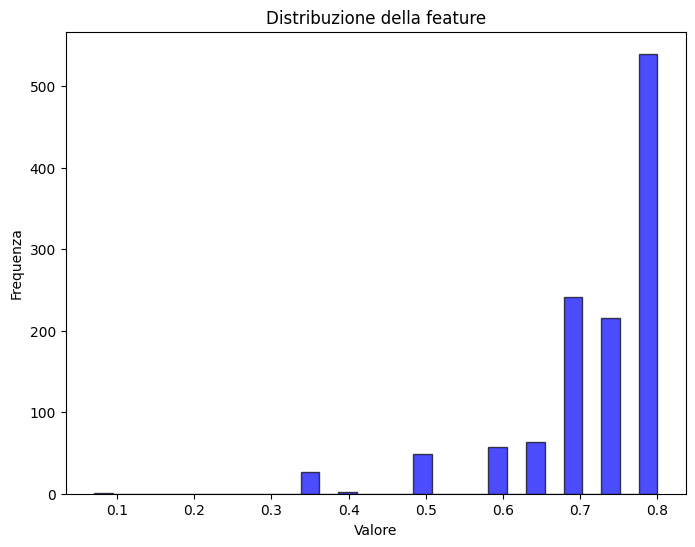

In [135]:
import matplotlib.pyplot as plt

import numpy as np

#plot the distribution of the actual_productivvity

plt.figure(figsize=(8, 6))
plt.hist(df['actual_productivity'], bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribuzione della feature')
plt.xlabel('Valore')
plt.ylabel('Frequenza')
plt.show()

#plot the distribution of the actual_productivvity
plt.figure(figsize=(8, 6))
plt.hist(df['targeted_productivity'], bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribuzione della feature')
plt.xlabel('Valore')
plt.ylabel('Frequenza')
plt.show()

In [136]:
df['targeted_productivity'].describe()

count    1197.000000
mean        0.729632
std         0.097891
min         0.070000
25%         0.700000
50%         0.750000
75%         0.800000
max         0.800000
Name: targeted_productivity, dtype: float64

**DEFINITION OF THE IDEA**

Since the scope of the dateset is to defne if a team as reached the target productivity, what we can do in order to assign a category for each team is to analyze the distribution of the targeted productivity and if some team has an actual productivity lower this mean this means that the team as a low rank of producctivity, otherwise it can be medium or hight, based on the range after the mean.

The total range of the productivity is (0-1) , as we can see the mean required by the supervisor is 0.72. So :

- If a team has an "actual productivity" <= 0.72 this is labeled as "LOW" (0).

- Otherway it is labeled as "HIGH" (1)

In [137]:
def categorize_productivity(productivity):
    if productivity <= 0.72:
        return 0 # Low
    
    else:
        return 1 # High

In [138]:
# Apply the function to create a new column
df['actual_productivity']=df['actual_productivity'].apply(categorize_productivity)


actual_productivity
1    735
0    462
Name: count, dtype: int64


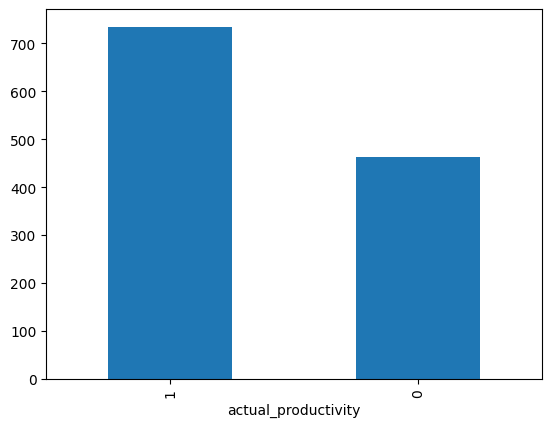

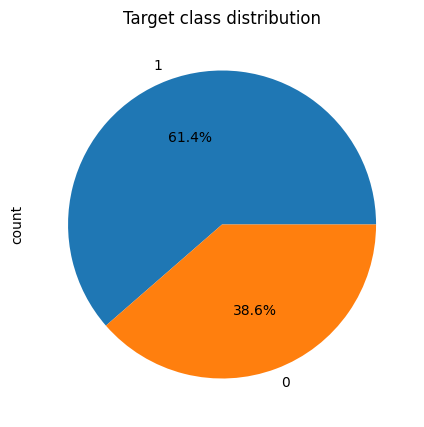

In [139]:
print(df['actual_productivity'].value_counts())
df['actual_productivity'].value_counts().plot(kind='bar')

#target class distribution with percetage in a pie chart
plt.figure(figsize=(5,5))
df['actual_productivity'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Target class distribution')
plt.show()



**PRE-PROCESSING**

*DATA CLEANING*

In [140]:
df_clean = df.copy()

**ANALYZE DEPARTMENT FEATURE**

In [141]:
df["department"].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

*Since there are 2 equal "unique value" we can merge all this row.*


In [142]:
df_clean['department'] = df_clean['department'].str.strip()

# View results
df_clean['department'].value_counts()

department
sweing       691
finishing    506
Name: count, dtype: int64

**ANALYSYS OF QUARTER COLUMN**

In [143]:
df["quarter"].unique()

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
      dtype=object)

*Since there is 5 quarter instead of 4 , we can merge 4 and 5 .*

In [144]:
# Replace 'Quarter5' with 'Quarter4'
df_clean['quarter'] = df_clean['quarter'].str.replace('Quarter5', 'Quarter4')

# View results
df_clean['quarter'].value_counts()

quarter
Quarter1    360
Quarter2    335
Quarter4    292
Quarter3    210
Name: count, dtype: int64

**HANDLING MISSING VALUE**

In [145]:
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

The only feature with Null value is thw wip feature:

*wip: Work in progress. Includes the number of unfinished items for products*

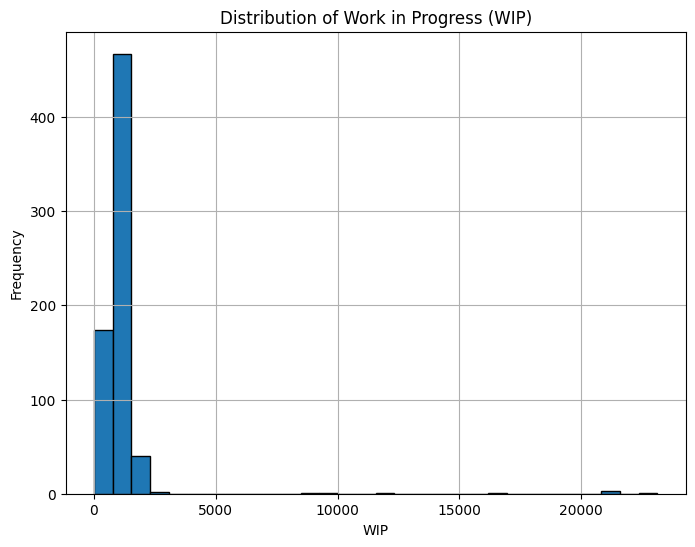

In [146]:
import matplotlib.pyplot as plt
# Plot the distribution of the wip feature
plt.figure(figsize=(8, 6))
df['wip'].plot(kind='hist', bins=30, edgecolor='black')
plt.title('Distribution of Work in Progress (WIP)')
plt.xlabel('WIP')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [147]:
df_clean['wip'].describe()

count      691.000000
mean      1190.465991
std       1837.455001
min          7.000000
25%        774.500000
50%       1039.000000
75%       1252.500000
max      23122.000000
Name: wip, dtype: float64

In [148]:
#To reduce the impact of outliers, we could impute missing values using the median.
df_clean['wip'].fillna(df_clean['wip'].mean(), inplace=True)
df_clean.isnull().sum()

C:\Users\Utente\AppData\Local\Temp\ipykernel_6636\1168751422.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['wip'].fillna(df_clean['wip'].mean(), inplace=True)


date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

**ADJUST THE Dtype OF SOME COMLUMNS**

In [149]:
df_clean['no_of_workers'] = df_clean['no_of_workers'].astype('int64')
df_clean['over_time'] = df_clean['over_time'].astype(float)
df_clean['incentive'] = df_clean['incentive'].astype(float)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    1197 non-null   float64
 8   over_time              1197 non-null   float64
 9   incentive              1197 non-null   float64
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   int64  
 14  actual_productivity    1197 non-null   int64  
dtypes: f

**DROPPING THE UNNECESSARY COLUMN**

In [150]:
df_clean.drop('date', axis=1, inplace=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   object 
 1   department             1197 non-null   object 
 2   day                    1197 non-null   object 
 3   team                   1197 non-null   int64  
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   wip                    1197 non-null   float64
 7   over_time              1197 non-null   float64
 8   incentive              1197 non-null   float64
 9   idle_time              1197 non-null   float64
 10  idle_men               1197 non-null   int64  
 11  no_of_style_change     1197 non-null   int64  
 12  no_of_workers          1197 non-null   int64  
 13  actual_productivity    1197 non-null   int64  
dtypes: float64(6), int64(5), object(3)
memory usage: 131.1+ 

**CATEGORICAL ENCODING**

In [151]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   object 
 1   department             1197 non-null   object 
 2   day                    1197 non-null   object 
 3   team                   1197 non-null   int64  
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   wip                    1197 non-null   float64
 7   over_time              1197 non-null   float64
 8   incentive              1197 non-null   float64
 9   idle_time              1197 non-null   float64
 10  idle_men               1197 non-null   int64  
 11  no_of_style_change     1197 non-null   int64  
 12  no_of_workers          1197 non-null   int64  
 13  actual_productivity    1197 non-null   int64  
dtypes: float64(6), int64(5), object(3)
memory usage: 131.1+ 

In [152]:
numerical_features = df_clean.select_dtypes(include=['float64', 'int64']).columns  
numerical_features

Index(['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity'],
      dtype='object')

In [153]:
from sklearn.preprocessing import OrdinalEncoder
# One-Hot Encoding for 'quarter', 'department', and 'day'
df_clean = pd.get_dummies(df_clean, columns=['department', 'day'], drop_first=True)
ordinal_enc = OrdinalEncoder(dtype='int64')
df_clean['quarter']=ordinal_enc.fit_transform(df_clean['quarter'].values.reshape(-1,1))


# Label Encoding for 'productivity_category'
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#df_clean['actual_productivity'] = le.fit_transform(df_clean['actual_productivity'])


df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   int64  
 1   team                   1197 non-null   int64  
 2   targeted_productivity  1197 non-null   float64
 3   smv                    1197 non-null   float64
 4   wip                    1197 non-null   float64
 5   over_time              1197 non-null   float64
 6   incentive              1197 non-null   float64
 7   idle_time              1197 non-null   float64
 8   idle_men               1197 non-null   int64  
 9   no_of_style_change     1197 non-null   int64  
 10  no_of_workers          1197 non-null   int64  
 11  actual_productivity    1197 non-null   int64  
 12  department_sweing      1197 non-null   bool   
 13  day_Saturday           1197 non-null   bool   
 14  day_Sunday             1197 non-null   bool   
 15  day_

In [154]:
#df_clean['actual_productivity']=df_clean['actual_productivity'].astype('int64')
#df_clean.info()

**EXPERIMENTS SETUP**

In [176]:
X=df_clean.drop('actual_productivity',axis=1)
y=df_clean['actual_productivity']


# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)



In [177]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

class_weight_dict

{0: 1.2967479674796747, 1: 0.8137755102040817}

In [178]:
categorical_features = X.columns.difference(numerical_features)
categorical_features

Index(['day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday', 'department_sweing', 'quarter'],
      dtype='object')

**KNN**

In [179]:
# Import delle librerie necessarie
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_validate, GridSearchCV, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score,classification_report, confusion_matrix

# Definizione delle metriche per la valutazione
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

Accuracy media della nested cross-validation: 0.7799
Precision media della nested cross-validation: 0.7827
Recall media della nested cross-validation: 0.7799
F1-score media della nested cross-validation: 0.7722
Miglior modello: {'knn__metric': 'manhattan', 'knn__n_neighbors': 15, 'knn__weights': 'distance'}
Resubstitution Classification Report:
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00       369
        High       1.00      1.00      1.00       588

    accuracy                           1.00       957
   macro avg       1.00      1.00      1.00       957
weighted avg       1.00      1.00      1.00       957



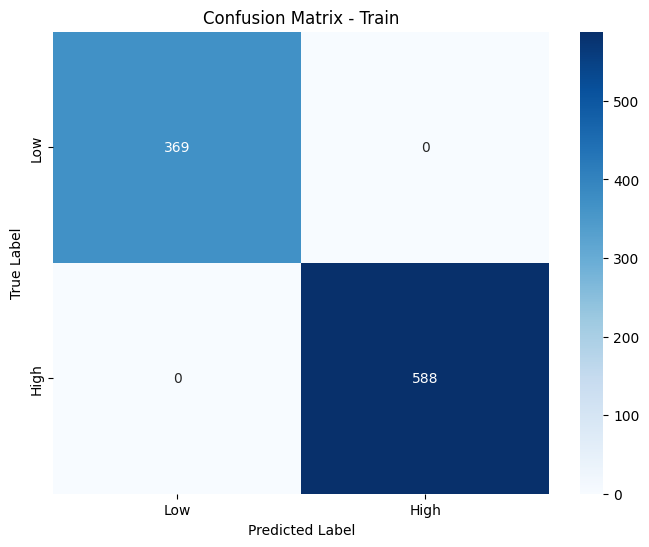

Generalization Classification Report:
              precision    recall  f1-score   support

         Low       0.78      0.56      0.65        93
        High       0.76      0.90      0.82       147

    accuracy                           0.77       240
   macro avg       0.77      0.73      0.74       240
weighted avg       0.77      0.77      0.76       240



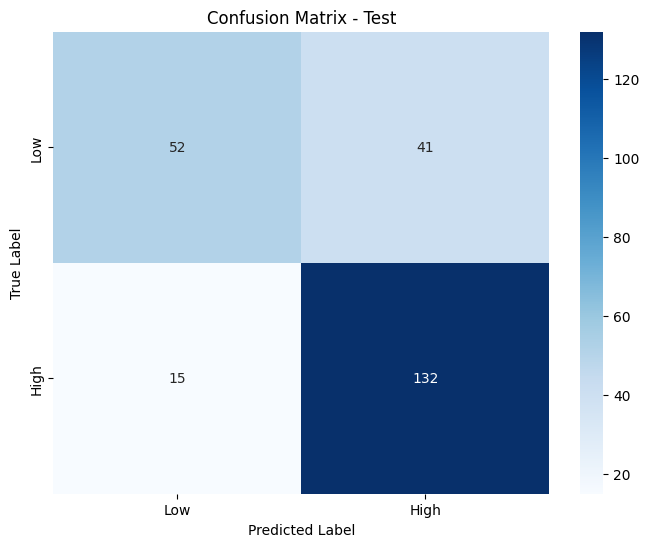

In [180]:





# Definizione della griglia dei parametri per il tuning di KNN
param_grid = {
    'knn__n_neighbors': np.arange(3, 50, 2),  # Numero di vicini
    'knn__weights': ['uniform', 'distance'],  # Pesi
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']  # Metrica
}

# Trasformazione delle feature
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features[:-1]),  # Applica lo scaler solo alle feature numeriche
        ('cat', 'passthrough', categorical_features)  # Le feature categoriali codificate vengono lasciate inalterate
    ]
)


# Creazione della pipeline: StandardScaler + SelectKBest + KNN
pipeline = Pipeline([
    ('scaler', preprocessor),  # Normalizzazione delle feature
    ('knn', KNeighborsClassifier())  # Modello KNN
])

# Definisci la GridSearchCV per il tuning dei parametri
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=10, n_jobs=-1, scoring='f1_weighted')

# Definizione della cross-validation esterna (RepeatedStratifiedKFold)
outer_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=42)



# Esegui la nested cross-validation con cross_validate
nested_cv_results = cross_validate(estimator=grid_search, 
                                   X=X_train, 
                                   y=y_train, 
                                   cv=outer_cv, 
                                   scoring=scoring, 
                                   return_train_score=True, 
                                   n_jobs=-1)

# Stampa i risultati della nested cross-validation
print(f"Accuracy media della nested cross-validation: {nested_cv_results['test_accuracy'].mean():.4f}")
print(f"Precision media della nested cross-validation: {nested_cv_results['test_precision'].mean():.4f}")
print(f"Recall media della nested cross-validation: {nested_cv_results['test_recall'].mean():.4f}")
print(f"F1-score media della nested cross-validation: {nested_cv_results['test_f1'].mean():.4f}")

# Recupera il miglior modello dalla GridSearchCV
grid_search.fit(X_train, y_train)
print(f"Miglior modello: {grid_search.best_params_}")
best_model = grid_search


######################## RESUBSTITUTION ERROR ###################


#Applica il miglior modello sul dataset di train
y_pred_res = best_model.predict(X_train)

# Stampa il report di classificazione
print("Resubstitution Classification Report:")

print(classification_report(y_train, y_pred_res, target_names=['Low',   'High']))

# Matrice di confusione
cm = confusion_matrix(y_train, y_pred_res)

# Visualizza la matrice di confusione
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low',   'High'], yticklabels=['Low',   'High'])
plt.title('Confusion Matrix - Train')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

######################## GENERALIZATION ERROR ###################

# Applica il miglior modello sul dataset di test
y_pred = best_model.predict(X_test)

# Stampa il report di classificazione
print("Generalization Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Low',   'High']))

# Matrice di confusione
cm = confusion_matrix(y_test, y_pred)

# Visualizza la matrice di confusione
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low',   'High'], yticklabels=['Low',   'High'])
plt.title('Confusion Matrix - Test')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


**ROC CURVE**

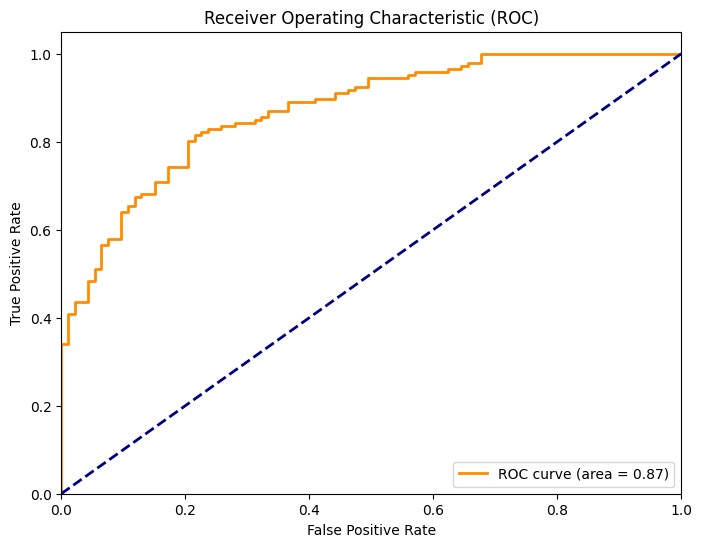

In [181]:
from sklearn.metrics import auc, roc_curve


y_scores_knn = grid_search.predict_proba(X_test)[:, 1]

# Plot ROC curve
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y_test, y_scores_knn)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

**FEATURE SELECTION**

Try to perform some feature selection with **MUTUAL INFORMATION** to handle overfitting caused by the cursed of dimensionality.

                  Feature  Mutual Information
6               incentive            0.198221
3                     smv            0.183515
2   targeted_productivity            0.146559
10          no_of_workers            0.077403
1                    team            0.068893
5               over_time            0.057904
8                idle_men            0.035860
9      no_of_style_change            0.033634
15            day_Tuesday            0.015697
0                 quarter            0.014648
13             day_Sunday            0.014044
7               idle_time            0.004559
14           day_Thursday            0.002372
11      department_sweing            0.000000
12           day_Saturday            0.000000
4                     wip            0.000000
16          day_Wednesday            0.000000


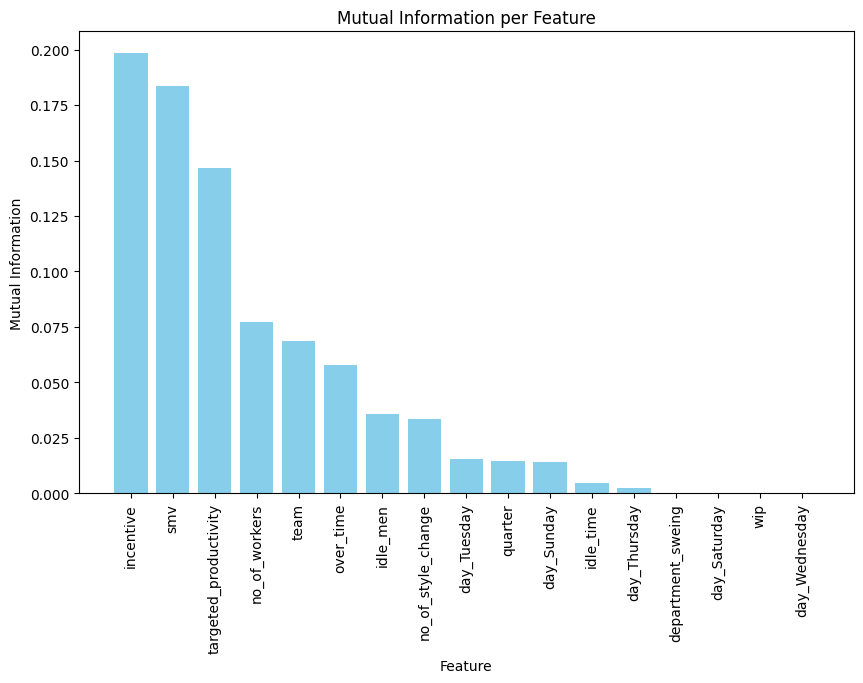

In [161]:
#Defintion of the mutual information method
from sklearn.feature_selection import mutual_info_classif


mutual_info = mutual_info_classif(X, y)

# Dataframe creation fo a better interpretation
mutual_info_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mutual_info
})

#Sortingn of the value with respect to the mutual information
mutual_info_df = mutual_info_df.sort_values(by='Mutual Information', ascending=False)
print(mutual_info_df)

# Histogram plotting for a better visualization
plt.figure(figsize=(10, 6))
plt.bar(mutual_info_df['Feature'], mutual_info_df['Mutual Information'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Mutual Information')
plt.title('Mutual Information per Feature')
plt.xticks(rotation=90)
plt.show()

In [162]:
threshold = 0.11

#take the name of the features with a mutual infrmation greater than the threshold
selected_features = mutual_info_df[mutual_info_df['Mutual Information'] > threshold]['Feature'].to_list()

print("Selected features: ", selected_features)

#Creation of the new dataset with the selected features
X_selected=df[selected_features]
y_selected=df['actual_productivity']

X_selected.info()

Selected features:  ['incentive', 'smv', 'targeted_productivity']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   incentive              1197 non-null   int64  
 1   smv                    1197 non-null   float64
 2   targeted_productivity  1197 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 28.2 KB


In [163]:
numerical_features_selected = X_selected.select_dtypes(include=['float64', 'int64']).columns
numerical_features_selected

Index(['incentive', 'smv', 'targeted_productivity'], dtype='object')

Accuracy media della nested cross-validation: 0.8287
Precision media della nested cross-validation: 0.8301
Recall media della nested cross-validation: 0.8287
F1-score media della nested cross-validation: 0.8275
Miglior modello: {'knn__metric': 'euclidean', 'knn__n_neighbors': 19, 'knn__weights': 'distance'}
Resubstitution Classification Report:
              precision    recall  f1-score   support

         Low       0.86      0.84      0.85       369
        High       0.90      0.91      0.91       588

    accuracy                           0.89       957
   macro avg       0.88      0.88      0.88       957
weighted avg       0.88      0.89      0.88       957



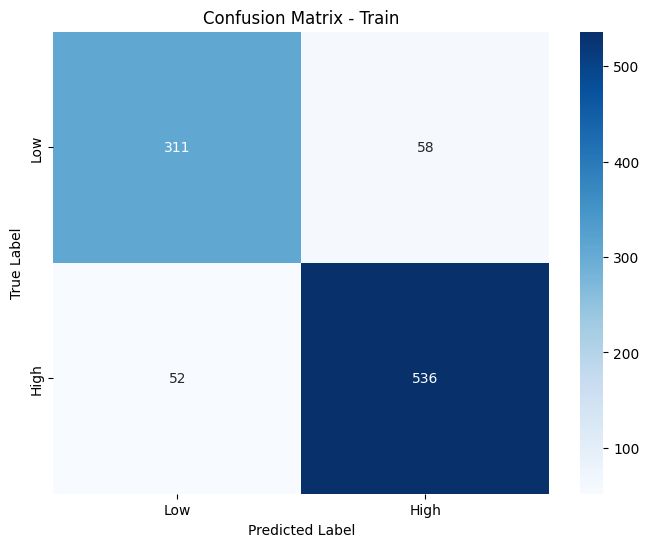

Generalization Classification Report:
              precision    recall  f1-score   support

         Low       0.74      0.66      0.70        93
        High       0.80      0.86      0.83       147

    accuracy                           0.78       240
   macro avg       0.77      0.76      0.76       240
weighted avg       0.78      0.78      0.78       240



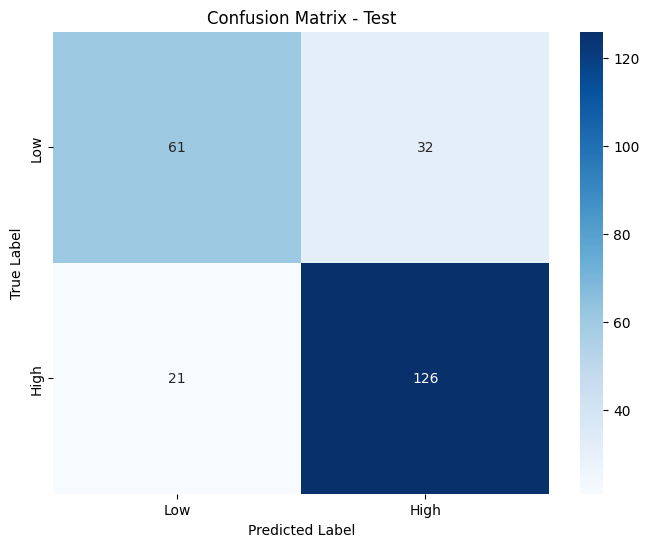

In [164]:

X_train,X_test,y_train,y_test=train_test_split(X_selected,y_selected,test_size=0.2,stratify=y_selected,random_state=42)
# Definizione della griglia dei parametri per il tuning di KNN
param_grid = {
    'knn__n_neighbors': np.arange(3, 50, 2),  # Numero di vicini
    'knn__weights': ['uniform', 'distance'],  # Pesi
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']  # Metrica
}

# Trasformazione delle feature
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_selected) # Applica lo scaler solo alle feature numeriche
        
    ]
)


# Creazione della pipeline: StandardScaler + SelectKBest + KNN
pipeline = Pipeline([
    ('scaler', preprocessor),  # Normalizzazione delle feature
    ('knn', KNeighborsClassifier())  # Modello KNN
])

# Definisci la GridSearchCV per il tuning dei parametri
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=10, n_jobs=-1, scoring='f1_weighted')

# Definizione della cross-validation esterna (RepeatedStratifiedKFold)
outer_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=42)

# Definizione delle metriche per la valutazione
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# Esegui la nested cross-validation con cross_validate
nested_cv_results = cross_validate(estimator=grid_search, 
                                   X=X_train, 
                                   y=y_train, 
                                   cv=outer_cv, 
                                   scoring=scoring, 
                                   return_train_score=True, 
                                   n_jobs=-1)

# Stampa i risultati della nested cross-validation
print(f"Accuracy media della nested cross-validation: {nested_cv_results['test_accuracy'].mean():.4f}")
print(f"Precision media della nested cross-validation: {nested_cv_results['test_precision'].mean():.4f}")
print(f"Recall media della nested cross-validation: {nested_cv_results['test_recall'].mean():.4f}")
print(f"F1-score media della nested cross-validation: {nested_cv_results['test_f1'].mean():.4f}")

# Recupera il miglior modello dalla GridSearchCV
grid_search.fit(X_train, y_train)
print(f"Miglior modello: {grid_search.best_params_}")
best_model = grid_search


######################## RESUBSTITUTION ERROR ###################


#Applica il miglior modello sul dataset di train
y_pred_res = best_model.predict(X_train)

# Stampa il report di classificazione
print("Resubstitution Classification Report:")

print(classification_report(y_train, y_pred_res, target_names=['Low',   'High']))

# Matrice di confusione
cm = confusion_matrix(y_train, y_pred_res)

# Visualizza la matrice di confusione
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low',   'High'], yticklabels=['Low',   'High'])
plt.title('Confusion Matrix - Train')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

######################## GENERALIZATION ERROR ###################

# Applica il miglior modello sul dataset di test
y_pred = best_model.predict(X_test)

# Stampa il report di classificazione
print("Generalization Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Low',   'High']))

# Matrice di confusione
cm = confusion_matrix(y_test, y_pred)

# Visualizza la matrice di confusione
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low',   'High'], yticklabels=['Low',   'High'])
plt.title('Confusion Matrix - Test')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()




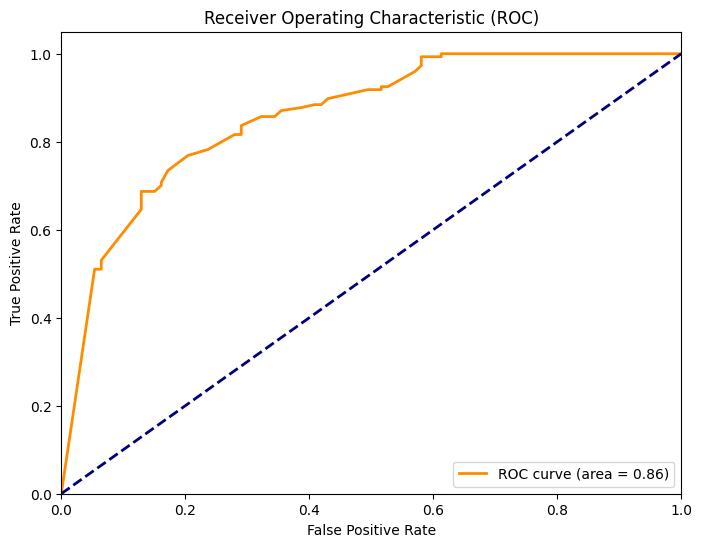

In [165]:
y_scores_knn = grid_search.predict_proba(X_test)[:, 1]

# Plot ROC curve
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y_test, y_scores_knn)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

**DECISION TREE**

Accuracy media della nested cross-validation: 0.8261
Precision media della nested cross-validation: 0.8326
Recall media della nested cross-validation: 0.8261
F1-score media della nested cross-validation: 0.8266
Miglior modello: {'dt__class_weight': 'balanced', 'dt__criterion': 'gini', 'dt__max_depth': 10, 'dt__min_samples_split': 3, 'dt__splitter': 'best'}
Resubstitution Classification Report:
              precision    recall  f1-score   support

         Low       0.95      0.97      0.96       369
        High       0.98      0.97      0.97       588

    accuracy                           0.97       957
   macro avg       0.97      0.97      0.97       957
weighted avg       0.97      0.97      0.97       957



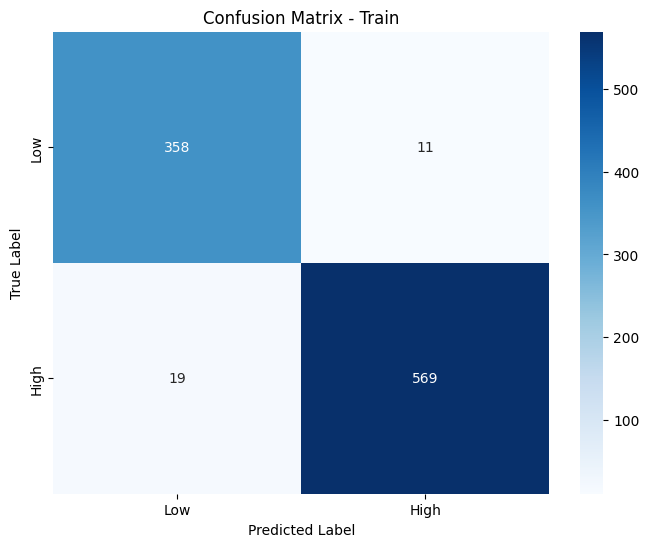

Generalization Classification Report:
              precision    recall  f1-score   support

         Low       0.74      0.72      0.73        93
        High       0.83      0.84      0.84       147

    accuracy                           0.80       240
   macro avg       0.79      0.78      0.78       240
weighted avg       0.79      0.80      0.80       240



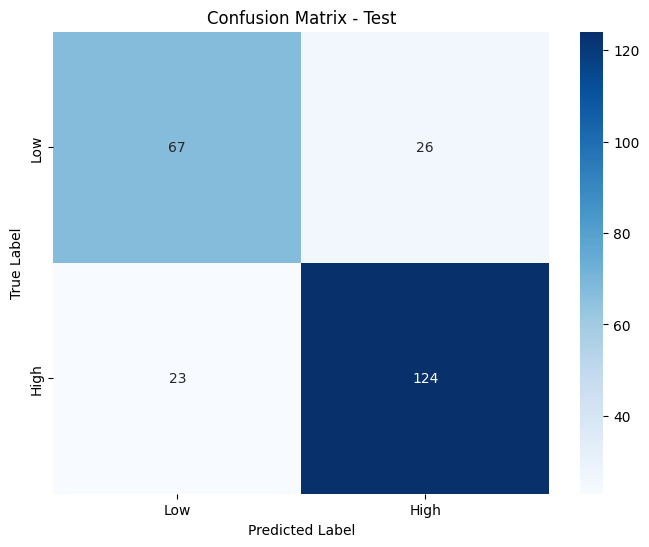

In [166]:
from sklearn.tree import DecisionTreeClassifier 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
# Trasformazione delle feature
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features[:-1]),  # Applica lo scaler solo alle feature numeriche
        ('cat', 'passthrough', categorical_features)  # Le feature categoriali codificate vengono lasciate inalterate
    ]
)
# Creazione della pipeline: StandardScaler + SelectKBest + KNN
pipeline_dt = Pipeline([
    ('scaler', preprocessor),  # Normalizzazione delle feature
    ('dt', DecisionTreeClassifier())  # Modello KNN
])

#definizione della griglia dei parametri per il tuning del Decision tree
dt_param_grid = {
    'dt__criterion': ['gini', 'entropy'],  # Criterion
    'dt__splitter': ['best', 'random'],  # Splitter
    'dt__max_depth': [None, 5, 10, 15],  # Profondità massima
    'dt__min_samples_split': np.arange(2, 10),  # Numero minimo di campioni per eff
    'dt__class_weight': ['balanced']  # Pesi delle classi

}


# Definisci la GridSearchCV per il tuning dei parametri
dt_grid_search = GridSearchCV(estimator=pipeline_dt, param_grid=dt_param_grid, cv=10, n_jobs=-1, scoring='f1_weighted')

# Definizione della cross-validation esterna (RepeatedStratifiedKFold)
outer_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=42)




# Esegui la nested cross-validation con cross_validate
dt_nested_cv_results = cross_validate(estimator=dt_grid_search, 
                                   X=X_train, 
                                   y=y_train, 
                                   cv=outer_cv, 
                                   scoring=scoring, 
                                   return_train_score=True, 
                                   n_jobs=-1)

# Stampa i risultati della nested cross-validation
print(f"Accuracy media della nested cross-validation: {dt_nested_cv_results['test_accuracy'].mean():.4f}")
print(f"Precision media della nested cross-validation: {dt_nested_cv_results['test_precision'].mean():.4f}")
print(f"Recall media della nested cross-validation: {dt_nested_cv_results['test_recall'].mean():.4f}")
print(f"F1-score media della nested cross-validation: {dt_nested_cv_results['test_f1'].mean():.4f}")

# Recupera il miglior modello dalla GridSearchCV
dt_grid_search.fit(X_train, y_train)
print(f"Miglior modello: {dt_grid_search.best_params_}")
dt_best_model = dt_grid_search


######################## RESUBSTITUTION ERROR ###################


#Applica il miglior modello sul dataset di train
y_pred_res = dt_best_model.predict(X_train)

# Stampa il report di classificazione
print("Resubstitution Classification Report:")

print(classification_report(y_train, y_pred_res, target_names=['Low',   'High']))

# Matrice di confusione
cm = confusion_matrix(y_train, y_pred_res)

# Visualizza la matrice di confusione
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low',   'High'], yticklabels=['Low',   'High'])
plt.title('Confusion Matrix - Train')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

######################## GENERALIZATION ERROR ###################

# Applica il miglior modello sul dataset di test
y_pred = dt_best_model.predict(X_test)

# Stampa il report di classificazione
print("Generalization Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Low',   'High']))

# Matrice di confusione
cm = confusion_matrix(y_test, y_pred)

# Visualizza la matrice di confusione
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low',   'High'], yticklabels=['Low',   'High'])
plt.title('Confusion Matrix - Test')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

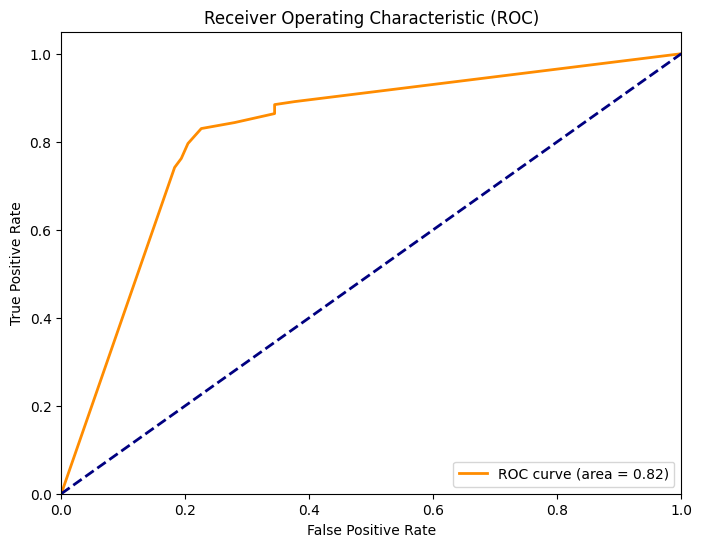

In [167]:
y_scores_knn = dt_grid_search.predict_proba(X_test)[:, 1]

# Plot ROC curve
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y_test, y_scores_knn)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

**Feature selection**

Accuracy media della nested cross-validation: 0.8319
Precision media della nested cross-validation: 0.8352
Recall media della nested cross-validation: 0.8319
F1-score media della nested cross-validation: 0.8317
Miglior modello: {'dt__class_weight': 'balanced', 'dt__criterion': 'gini', 'dt__max_depth': 10, 'dt__min_samples_split': 4, 'dt__splitter': 'random'}
Resubstitution Classification Report:
              precision    recall  f1-score   support

         Low       0.77      0.89      0.83       369
        High       0.92      0.84      0.88       588

    accuracy                           0.86       957
   macro avg       0.85      0.86      0.85       957
weighted avg       0.86      0.86      0.86       957



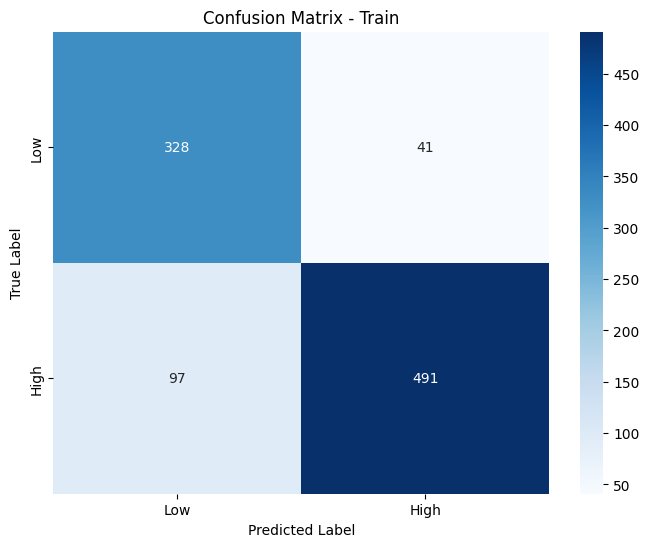

Generalization Classification Report:
              precision    recall  f1-score   support

         Low       0.70      0.76      0.73        93
        High       0.84      0.80      0.82       147

    accuracy                           0.78       240
   macro avg       0.77      0.78      0.78       240
weighted avg       0.79      0.78      0.78       240



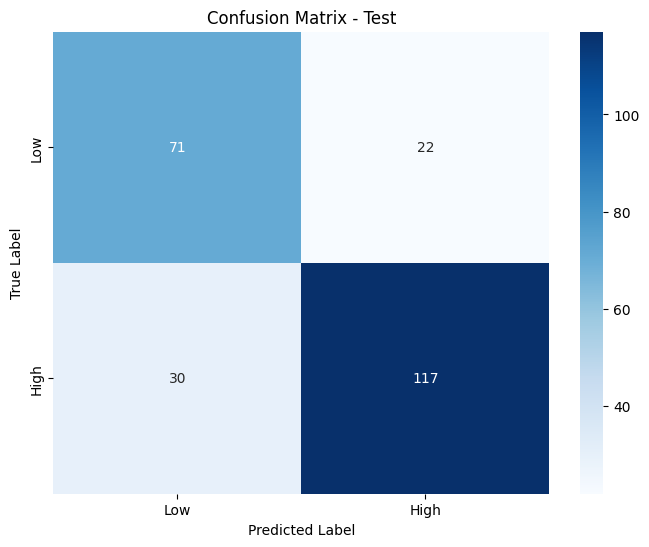

In [ ]:

from sklearn.tree import DecisionTreeClassifier
X_train_sel,X_test_sel,y_train_sel,y_test_sel=train_test_split(X_selected,y_selected,test_size=0.2,stratify=y_selected,random_state=42)
# Definizione della griglia dei parametri per il tuning di KNN
#definizione della griglia dei parametri per il tuning del Decision tree
dt_sel_param_grid = {
    'dt__criterion': ['gini', 'entropy'],  # Criterion
    'dt__splitter': ['best', 'random'],  # Splitter
    'dt__max_depth': [None, 5, 10, 15],  # Profondità massima
    'dt__min_samples_split': np.arange(2, 10),  # Numero minimo di campioni per eff
    'dt__class_weight': ['balanced']  # Pesi delle classi

}

# Trasformazione delle feature
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_selected) # Applica lo scaler solo alle feature numeriche
        
    ]
)


# Creazione della pipeline: StandardScaler + SelectKBest + KNN
pipeline_dt_sel = Pipeline([
    ('scaler', preprocessor),  # Normalizzazione delle feature
    ('dt', DecisionTreeClassifier())  # Modello KNN
])

# Definisci la GridSearchCV per il tuning dei parametri
dt_sel_grid_search = GridSearchCV(estimator=pipeline_dt_sel, param_grid=dt_sel_param_grid, cv=10, n_jobs=-1, scoring='f1_weighted')

# Definizione della cross-validation esterna (RepeatedStratifiedKFold)
outer_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=42)




# Esegui la nested cross-validation con cross_validate
dt_sel_nested_cv_results = cross_validate(estimator=dt_sel_grid_search, 
                                   X=X_train_sel, 
                                   y=y_train_sel, 
                                   cv=outer_cv, 
                                   scoring=scoring, 
                                   return_train_score=True, 
                                   n_jobs=-1)

# Stampa i risultati della nested cross-validation
print(f"Accuracy media della nested cross-validation: {dt_sel_nested_cv_results['test_accuracy'].mean():.4f}")
print(f"Precision media della nested cross-validation: {dt_sel_nested_cv_results['test_precision'].mean():.4f}")
print(f"Recall media della nested cross-validation: {dt_sel_nested_cv_results['test_recall'].mean():.4f}")
print(f"F1-score media della nested cross-validation: {dt_sel_nested_cv_results['test_f1'].mean():.4f}")

# Recupera il miglior modello dalla GridSearchCV
dt_sel_grid_search.fit(X_train, y_train)
print(f"Miglior modello: {dt_sel_grid_search.best_params_}")
dt_sel_best_model = dt_sel_grid_search


######################## RESUBSTITUTION ERROR ###################


#Applica il miglior modello sul dataset di train
y_pred_res = dt_sel_best_model.predict(X_train_sel)

# Stampa il report di classificazione
print("Resubstitution Classification Report:")

print(classification_report(y_train_sel, y_pred_res, target_names=['Low',   'High']))

# Matrice di confusione
cm = confusion_matrix(y_train_sel, y_pred_res)

# Visualizza la matrice di confusione
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low',   'High'], yticklabels=['Low',   'High'])
plt.title('Confusion Matrix - Train')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

######################## GENERALIZATION ERROR ###################

# Applica il miglior modello sul dataset di test
y_pred = dt_sel_best_model.predict(X_test_sel)  

# Stampa il report di classificazione
print("Generalization Classification Report:")
print(classification_report(y_test_sel, y_pred, target_names=['Low',   'High']))

# Matrice di confusione
cm = confusion_matrix(y_test_sel, y_pred)

# Visualizza la matrice di confusione
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low',   'High'], yticklabels=['Low',   'High'])
plt.title('Confusion Matrix - Test')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

**RANDOM FOREST**

Accuracy media della nested cross-validation: 0.8531
Precision media della nested cross-validation: 0.8571
Recall media della nested cross-validation: 0.8531
F1-score media della nested cross-validation: 0.8534
Miglior modello: {'rf__ccp_alpha': 0.005, 'rf__class_weight': 'balanced', 'rf__max_depth': 15, 'rf__n_estimators': 300}
Resubstitution Classification Report:
              precision    recall  f1-score   support

         Low       0.84      0.89      0.86       369
        High       0.93      0.89      0.91       588

    accuracy                           0.89       957
   macro avg       0.88      0.89      0.88       957
weighted avg       0.89      0.89      0.89       957



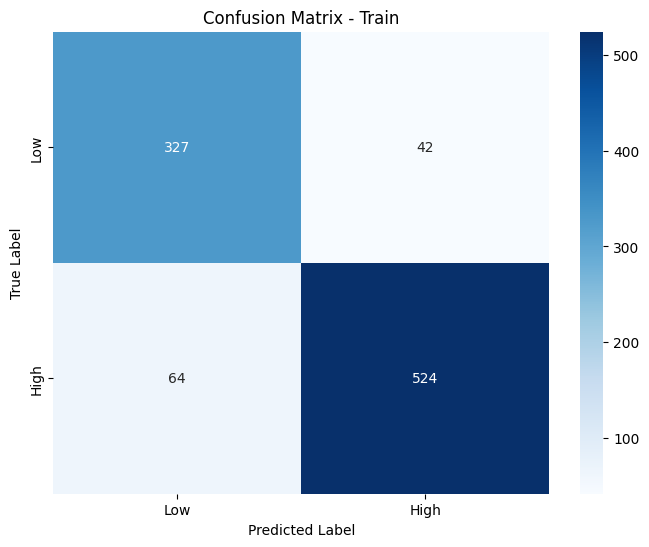

Generalization Classification Report:
              precision    recall  f1-score   support

         Low       0.81      0.81      0.81        93
        High       0.88      0.88      0.88       147

    accuracy                           0.85       240
   macro avg       0.84      0.84      0.84       240
weighted avg       0.85      0.85      0.85       240



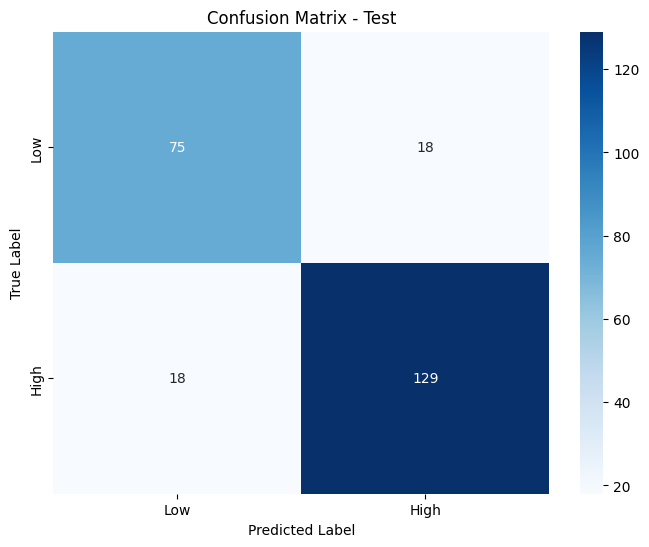

In [169]:
from sklearn.ensemble import RandomForestClassifier 

# Trasformazione delle feature
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features[:-1]),  # Applica lo scaler solo alle feature numeriche
        ('cat', 'passthrough', categorical_features)  # Le feature categoriali codificate vengono lasciate inalterate
    ]
)
# Creazione della pipeline: StandardScaler + SelectKBest + KNN
pipeline_rf = Pipeline([
    ('scaler', preprocessor),  # Normalizzazione delle feature
    ('rf', RandomForestClassifier())  # Modello KNN
])

#definizione della griglia dei parametri per il tuning del Decision tree
rf_param_grid = {
    'rf__n_estimators': [100,200,300],  # Numero di alberi
    'rf__max_depth': [5, 10, 15],
    'rf__ccp_alpha': [0.005, 0.01, 0.015],
    'rf__class_weight': ['balanced']
}




# Definisci la GridSearchCV per il tuning dei parametri
rf_grid_search = GridSearchCV(estimator=pipeline_rf, param_grid=rf_param_grid, cv=10, n_jobs=-1, scoring='f1_weighted')

# Definizione della cross-validation esterna (RepeatedStratifiedKFold)
outer_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=42)




# Esegui la nested cross-validation con cross_validate
rf_nested_cv_results = cross_validate(estimator=rf_grid_search, 
                                   X=X_train, 
                                   y=y_train, 
                                   cv=outer_cv, 
                                   scoring=scoring, 
                                   return_train_score=True, 
                                   n_jobs=-1)

# Stampa i risultati della nested cross-validation
print(f"Accuracy media della nested cross-validation: {rf_nested_cv_results['test_accuracy'].mean():.4f}")
print(f"Precision media della nested cross-validation: {rf_nested_cv_results['test_precision'].mean():.4f}")
print(f"Recall media della nested cross-validation: {rf_nested_cv_results['test_recall'].mean():.4f}")
print(f"F1-score media della nested cross-validation: {rf_nested_cv_results['test_f1'].mean():.4f}")

# Recupera il miglior modello dalla GridSearchCV
rf_grid_search.fit(X_train, y_train)
print(f"Miglior modello: {rf_grid_search.best_params_}")
rf_best_model = rf_grid_search


######################## RESUBSTITUTION ERROR ###################


#Applica il miglior modello sul dataset di train
y_pred_res = rf_best_model.predict(X_train)

# Stampa il report di classificazione
print("Resubstitution Classification Report:")

print(classification_report(y_train, y_pred_res, target_names=['Low',   'High']))

# Matrice di confusione
cm = confusion_matrix(y_train, y_pred_res)

# Visualizza la matrice di confusione
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low',   'High'], yticklabels=['Low',   'High'])
plt.title('Confusion Matrix - Train')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

######################## GENERALIZATION ERROR ###################

# Applica il miglior modello sul dataset di test
y_pred = rf_best_model.predict(X_test)

# Stampa il report di classificazione
print("Generalization Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Low',   'High']))

# Matrice di confusione
cm = confusion_matrix(y_test, y_pred)

# Visualizza la matrice di confusione
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low',   'High'], yticklabels=['Low',   'High'])
plt.title('Confusion Matrix - Test')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

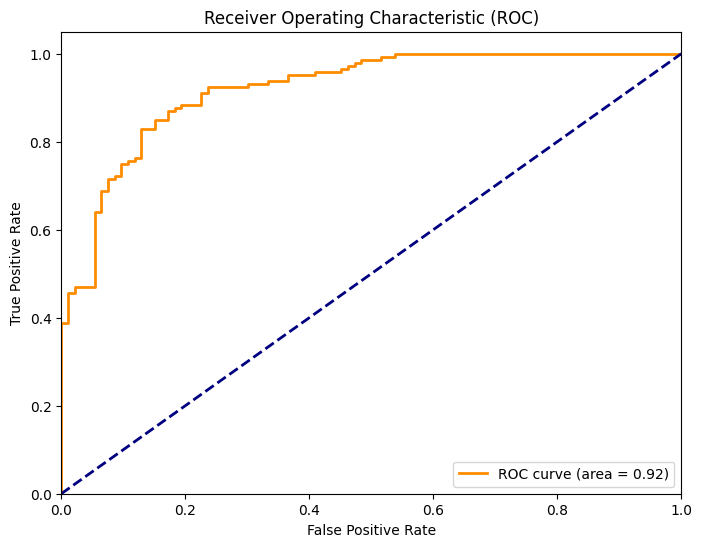

In [170]:
y_scores_knn = rf_grid_search.predict_proba(X_test)[:, 1]

# Plot ROC curve
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y_test, y_scores_knn)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

**LOGISTIC REGRESSION**

Accuracy media della nested cross-validation: 0.7683
Precision media della nested cross-validation: 0.7690
Recall media della nested cross-validation: 0.7683
F1-score media della nested cross-validation: 0.7669
Miglior modello: {'lr__C': 0.01, 'lr__class_weight': 'balanced', 'lr__penalty': 'l1', 'lr__solver': 'liblinear'}
Resubstitution Classification Report:
              precision    recall  f1-score   support

         Low       0.71      0.68      0.70       369
        High       0.80      0.83      0.82       588

    accuracy                           0.77       957
   macro avg       0.76      0.75      0.76       957
weighted avg       0.77      0.77      0.77       957



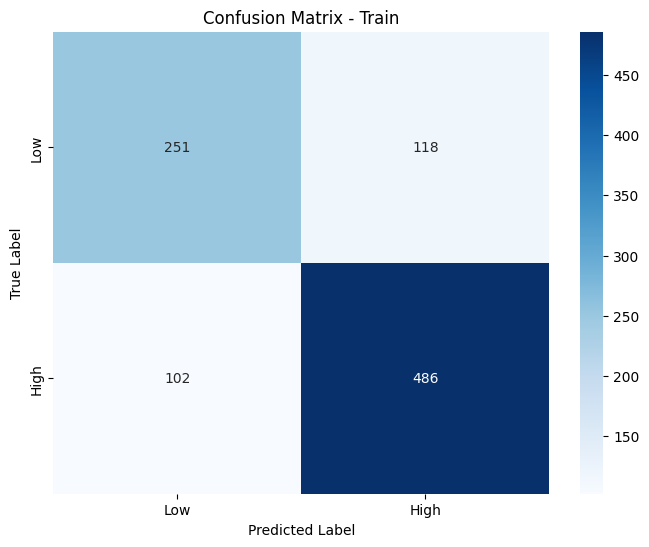

Generalization Classification Report:
              precision    recall  f1-score   support

         Low       0.74      0.70      0.72        93
        High       0.82      0.84      0.83       147

    accuracy                           0.79       240
   macro avg       0.78      0.77      0.77       240
weighted avg       0.79      0.79      0.79       240



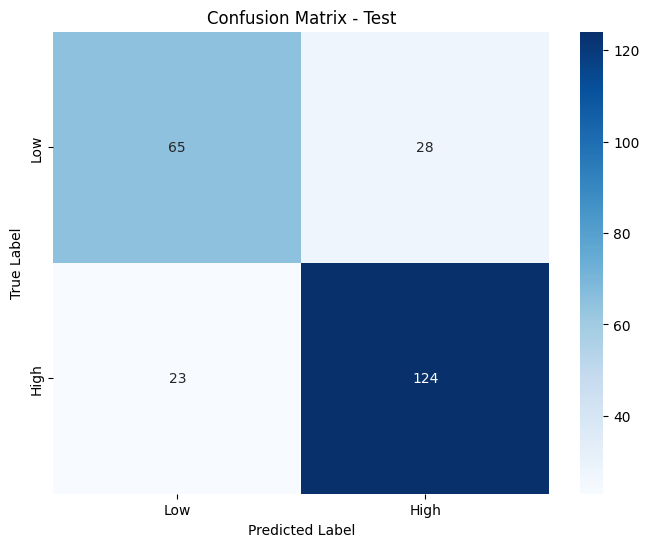

In [171]:
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, cross_validate
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

# Trasformazione delle feature
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features[:-1]),  # Applica lo scaler solo alle feature numeriche
        ('cat', 'passthrough', categorical_features)  # Le feature categoriali codificate vengono lasciate inalterate
    ]
)

# Creazione della pipeline: StandardScaler + Logistic Regression
pipeline_lr = Pipeline([
    ('scaler', preprocessor),  # Normalizzazione delle feature
    ('lr', LogisticRegression())  # Modello Logistic Regression
])

# Definizione della griglia dei parametri per il tuning della Logistic Regression
lr_param_grid = {
    'lr__penalty': ['l1', 'l2'],  # Tipo di penalizzazione
    'lr__C': [0.01, 0.1, 1, 10, 100],  # Inverso della forza della regolarizzazione
    'lr__solver': ['liblinear', 'saga'],  # Solvers compatibili con l1 e elasticnet
    'lr__class_weight': ['balanced']
}

# Definisci la GridSearchCV per il tuning dei parametri
lr_grid_search = GridSearchCV(estimator=pipeline_lr, param_grid=lr_param_grid, cv=10, n_jobs=-1, scoring='f1_weighted')

# Definizione della cross-validation esterna (RepeatedStratifiedKFold)
outer_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=42)

# Esegui la nested cross-validation con cross_validate
lr_nested_cv_results = cross_validate(estimator=lr_grid_search, 
                                   X=X_train, 
                                   y=y_train, 
                                   cv=outer_cv, 
                                   scoring=scoring, 
                                   return_train_score=True, 
                                   n_jobs=-1)

# Stampa i risultati della nested cross-validation
print(f"Accuracy media della nested cross-validation: {lr_nested_cv_results['test_accuracy'].mean():.4f}")
print(f"Precision media della nested cross-validation: {lr_nested_cv_results['test_precision'].mean():.4f}")
print(f"Recall media della nested cross-validation: {lr_nested_cv_results['test_recall'].mean():.4f}")
print(f"F1-score media della nested cross-validation: {lr_nested_cv_results['test_f1'].mean():.4f}")

# Recupera il miglior modello dalla GridSearchCV
lr_grid_search.fit(X_train, y_train)
print(f"Miglior modello: {lr_grid_search.best_params_}")
lr_best_model = lr_grid_search

######################## RESUBSTITUTION ERROR ###################

# Applica il miglior modello sul dataset di train
y_pred_res = lr_best_model.predict(X_train)

# Stampa il report di classificazione
print("Resubstitution Classification Report:")
print(classification_report(y_train, y_pred_res, target_names=['Low', 'High']))

# Matrice di confusione
cm = confusion_matrix(y_train, y_pred_res)

# Visualizza la matrice di confusione
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.title('Confusion Matrix - Train')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

######################## GENERALIZATION ERROR ###################

# Applica il miglior modello sul dataset di test
y_pred = lr_best_model.predict(X_test)

# Stampa il report di classificazione
print("Generalization Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Low', 'High']))

# Matrice di confusione
cm = confusion_matrix(y_test, y_pred)

# Visualizza la matrice di confusione
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.title('Confusion Matrix - Test')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


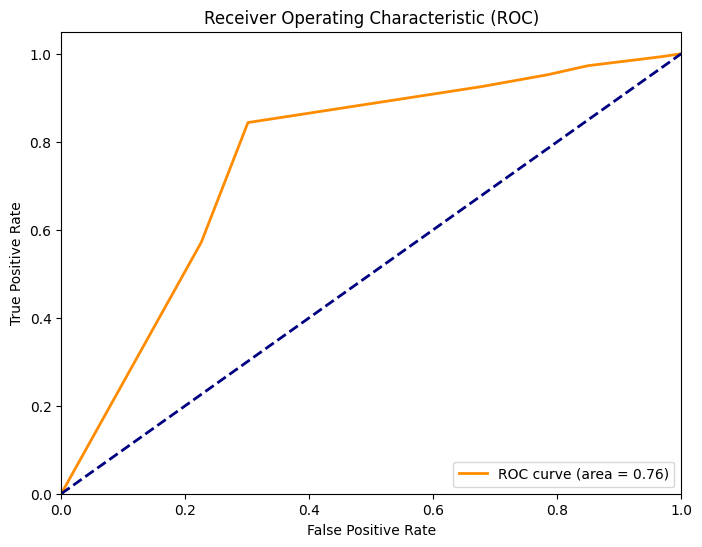

In [172]:
y_scores_knn = lr_grid_search.predict_proba(X_test)[:, 1]

# Plot ROC curve
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y_test, y_scores_knn)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

**MODEL COMPARISON**

**DECISION TREE VS KNN**

In [182]:
from scipy.stats import ttest_rel
import numpy as np

# Extract the cross-validation scores from nested_cv_results for both models (KNN and Decision Tree)
knn_accuracy = nested_cv_results['test_accuracy']
dt_accuracy = dt_nested_cv_results['test_accuracy']

knn_precision = nested_cv_results['test_precision']
dt_precision = dt_nested_cv_results['test_precision']

knn_recall = nested_cv_results['test_recall']
dt_recall = dt_nested_cv_results['test_recall']

knn_f1 = nested_cv_results['test_f1']
dt_f1 = dt_nested_cv_results['test_f1']

# Perform paired t-tests for each metric
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
knn_scores = [knn_accuracy, knn_precision, knn_recall, knn_f1]
dt_scores = [dt_accuracy, dt_precision, dt_recall, dt_f1]

for metric, knn_score, dt_score in zip(metrics, knn_scores, dt_scores):
    t_stat, p_value = ttest_rel(knn_score, dt_score)
    print(f"\nPaired t-test for {metric}:")
    print(f"T-statistic: {t_stat:.4f}")
    print(f"P-value: {p_value:.4f}")
    if p_value < 0.05:
        print(f"There is a statistically significant difference in {metric} between the models.")
    else:
        print(f"There is no statistically significant difference in {metric} between the models.")



Paired t-test for Accuracy:
T-statistic: -10.8250
P-value: 0.0000
There is a statistically significant difference in Accuracy between the models.

Paired t-test for Precision:
T-statistic: -11.4656
P-value: 0.0000
There is a statistically significant difference in Precision between the models.

Paired t-test for Recall:
T-statistic: -10.8250
P-value: 0.0000
There is a statistically significant difference in Recall between the models.

Paired t-test for F1-Score:
T-statistic: -12.5474
P-value: 0.0000
There is a statistically significant difference in F1-Score between the models.


**DECISION TREE VS RANDOM FOREST**

In [183]:
from scipy.stats import ttest_rel

# Estrazione delle metriche dai risultati della cross-validation
dt_accuracy = dt_nested_cv_results['test_accuracy']
rf_accuracy = rf_nested_cv_results['test_accuracy']

dt_precision = dt_nested_cv_results['test_precision']
rf_precision = rf_nested_cv_results['test_precision']

dt_recall = dt_nested_cv_results['test_recall']
rf_recall = rf_nested_cv_results['test_recall']

dt_f1 = dt_nested_cv_results['test_f1']
rf_f1 = rf_nested_cv_results['test_f1']

# Esegui il paired t-test per ogni metrica
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
dt_scores = [dt_accuracy, dt_precision, dt_recall, dt_f1]
rf_scores = [rf_accuracy, rf_precision, rf_recall, rf_f1]

for metric, dt_score, rf_score in zip(metrics, dt_scores, rf_scores):
    t_stat, p_value = ttest_rel(dt_score, rf_score)
    print(f"\nPaired t-test per {metric}:")
    print(f"T-statistic: {t_stat:.4f}")
    print(f"P-value: {p_value:.4f}")
    if p_value < 0.05:
        print(f"C'è una differenza statisticamente significativa per {metric} tra Decision Tree e Random Forest.")
    else:
        print(f"Non c'è una differenza statisticamente significativa per {metric} tra Decision Tree e Random Forest.")



Paired t-test per Accuracy:
T-statistic: -7.0179
P-value: 0.0000
C'è una differenza statisticamente significativa per Accuracy tra Decision Tree e Random Forest.

Paired t-test per Precision:
T-statistic: -6.5842
P-value: 0.0000
C'è una differenza statisticamente significativa per Precision tra Decision Tree e Random Forest.

Paired t-test per Recall:
T-statistic: -7.0179
P-value: 0.0000
C'è una differenza statisticamente significativa per Recall tra Decision Tree e Random Forest.

Paired t-test per F1-Score:
T-statistic: -6.9631
P-value: 0.0000
C'è una differenza statisticamente significativa per F1-Score tra Decision Tree e Random Forest.


**KNN VS RANDOM FOREST**

In [184]:
from scipy.stats import ttest_rel

# Estrazione delle metriche dai risultati della cross-validation
knn_accuracy = nested_cv_results['test_accuracy']
rf_accuracy = rf_nested_cv_results['test_accuracy']

knn_precision = nested_cv_results['test_precision']
rf_precision = rf_nested_cv_results['test_precision']

knn_recall = nested_cv_results['test_recall']
rf_recall = rf_nested_cv_results['test_recall']

knn_f1 = nested_cv_results['test_f1']
rf_f1 = rf_nested_cv_results['test_f1']

# Esegui il paired t-test per ogni metrica
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
knn_scores = [knn_accuracy, knn_precision, knn_recall, knn_f1]
rf_scores = [rf_accuracy, rf_precision, rf_recall, rf_f1]

for metric, knn_score, rf_score in zip(metrics, knn_scores, rf_scores):
    t_stat, p_value = ttest_rel(knn_score, rf_score)
    print(f"\nPaired t-test per {metric}:")
    print(f"T-statistic: {t_stat:.4f}")
    print(f"P-value: {p_value:.4f}")
    if p_value < 0.05:
        print(f"C'è una differenza statisticamente significativa per {metric} tra KNN e Random Forest.")
    else:
        print(f"Non c'è una differenza statisticamente significativa per {metric} tra KNN e Random Forest.")



Paired t-test per Accuracy:
T-statistic: -19.1615
P-value: 0.0000
C'è una differenza statisticamente significativa per Accuracy tra KNN e Random Forest.

Paired t-test per Precision:
T-statistic: -18.7324
P-value: 0.0000
C'è una differenza statisticamente significativa per Precision tra KNN e Random Forest.

Paired t-test per Recall:
T-statistic: -19.1615
P-value: 0.0000
C'è una differenza statisticamente significativa per Recall tra KNN e Random Forest.

Paired t-test per F1-Score:
T-statistic: -20.8871
P-value: 0.0000
C'è una differenza statisticamente significativa per F1-Score tra KNN e Random Forest.
